In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        (os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import os
import cv2
import numpy as np

In [3]:
dataset_dir = "/kaggle/input/oral-diseases-images/oral diseases/"
images = []
labels = []
for label in os.listdir(dataset_dir):
    label_path = os.path.join(dataset_dir, label)
    if os.path.isdir(label_path):
        for image_file in os.listdir(label_path):
            image_path = os.path.join(label_path, image_file)

            # Read the image using OpenCV
            image = cv2.imread(image_path)
            
            # Check if the image was loaded successfully
            if image is not None:
                # Resize the image to a specific size
                image = cv2.resize(image, (224, 224))
            
                # Append the image and its corresponding label to the lists
                images.append(image)
                labels.append(label)
            else:
                print(f"Failed to load image: {image_path}")

Failed to load image: /kaggle/input/oral-diseases-images/oral diseases/Caries_Gingivitus_ToothDiscoloration_Ulcer-yolo_annotated-Dataset/Caries_Gingivitus_ToothDiscoloration_Ulcer-yolo_annotated-Dataset


In [4]:
unique_labels = np.unique(labels)
unique_labels

array(['Calculus', 'Caries', 'Gingivitis', 'Mouth Ulcer',
       'Tooth Discoloration', 'hypodontia'], dtype='<U19')

In [5]:
data = list(zip(images, labels))

# Shuffle the data while keeping image-label pairs intact
np.random.shuffle(data)

# Split the shuffled data back into separate arrays
shuffled_images, shuffled_labels = zip(*data)

# Convert them back to numpy arrays if needed
shuffled_images = np.array(shuffled_images)
shuffled_labels = np.array(shuffled_labels)

In [6]:
validation_ratio = 0.2

num_validation_samples = int(len(shuffled_images) * validation_ratio)

train_images = shuffled_images[num_validation_samples:]
train_labels = shuffled_labels[num_validation_samples:]

validation_images = shuffled_images[:num_validation_samples]
validation_labels = shuffled_labels[:num_validation_samples]

In [7]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
train_labels = label_encoder.fit_transform(train_labels)
validation_labels = label_encoder.transform(validation_labels)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [8]:
import tensorflow as tf
#from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications import VGG16

from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from keras.layers import BatchNormalization
from keras.layers import Dropout

In [9]:
# Define list of image paths and labels as tuples
base_model = InceptionV3(weights='imagenet', include_top=False)

# Add custom classification layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
predictions = Dense(6, activation='softmax')(x)  # Adjust 'num_classes' to your specific case

model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


87910968/87910968 [==============================] - 0s 0us/step


In [10]:
batch_size = 16
steps_per_epoch = len(train_images) // batch_size

# Define a GPU memory configuration
gpu_options = tf.compat.v1.GPUOptions(allow_growth=True)
config = tf.compat.v1.ConfigProto(gpu_options=gpu_options)
tf.compat.v1.Session(config=config)

history = model.fit(
    train_images, train_labels,
    steps_per_epoch=steps_per_epoch,
    epochs=20,
)

Epoch 1/20
616/616 [==============================] - 132s 122ms/step - loss: 0.8786 - accuracy: 0.6640
Epoch 2/20
616/616 [==============================] - 77s 125ms/step - loss: 0.5561 - accuracy: 0.7845
Epoch 3/20
616/616 [==============================] - 77s 125ms/step - loss: 0.4389 - accuracy: 0.8290
Epoch 4/20
616/616 [==============================] - 77s 125ms/step - loss: 0.3869 - accuracy: 0.8484
Epoch 5/20
616/616 [==============================] - 77s 125ms/step - loss: 0.3428 - accuracy: 0.8634
Epoch 6/20
616/616 [==============================] - 77s 125ms/step - loss: 0.3153 - accuracy: 0.8776
Epoch 7/20
616/616 [==============================] - 77s 125ms/step - loss: 0.2953 - accuracy: 0.8824
Epoch 8/20
616/616 [==============================] - 77s 124ms/step - loss: 0.2581 - accuracy: 0.8998
Epoch 9/20
616/616 [==============================] - 77s 124ms/step - loss: 0.2320 - accuracy: 0.9050
Epoch 10/20
616/616 [==============================] - 77s 124ms/step - 

In [11]:
#save the model
model.save('oral_diseases_model7.h5')

In [12]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(validation_images, validation_labels)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

77/77 [==============================] - 8s 61ms/step - loss: 0.2696 - accuracy: 0.8949
Test Loss: 0.2696
Test Accuracy: 0.8949


In [13]:
image_path='/kaggle/input/oral-diseases-images/oral diseases/Gingivitis/(1000).JPG'
img = cv2.imread(image_path)
if img is not None:
    img = cv2.resize(img, (224, 224))
    img = np.expand_dims(img, axis=0)  # Add a batch dimension
else:
    print("Failed to load the image:", image_path)

# Make predictions using the model
if img is not None:
    predictions = model.predict(img)
    predicted_labels = np.argmax(predictions, axis=1)
    print("Predicted labels:", predicted_labels)
    print("Predicted labels:", unique_labels[predicted_labels])
else:
    print("Prediction not performed due to image loading error.")

1/1 [==============================] - 2s 2s/step
Predicted labels: [2]
Predicted labels: ['Gingivitis']


In [14]:
from sklearn.metrics import confusion_matrix
predicted=model.predict(validation_images)

predicted_labels = np.argmax(predicted, axis=1)

cm = confusion_matrix(validation_labels, predicted_labels)

77/77 [==============================] - 5s 61ms/step


In [15]:
print(cm)

[[212   8  70   0   3   0]
 [  2 477   3   6   6   1]
 [ 78  14 338   1   6   8]
 [  0   7   0 586   4   1]
 [  4  19   0   7 350   1]
 [  2   5   1   2   0 242]]


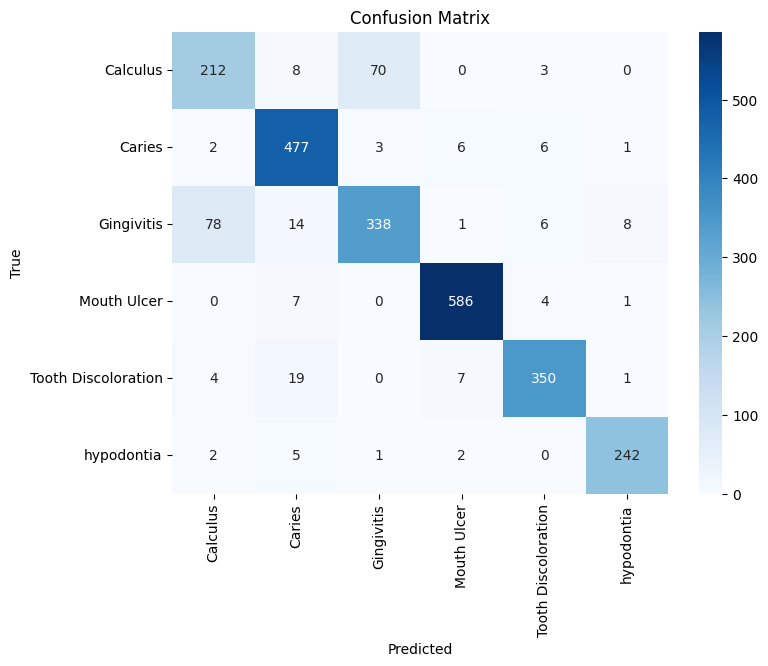

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=unique_labels, yticklabels=unique_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.savefig('vgg_20epochs.png', format='png')
plt.show()